In [1]:
import pandas as pd

commentaries = pd.read_csv('../scrapper/commentaries.csv')
commentaries.head()

,pg_index,commentary_source,commentary,score
0,0,supervasco,A3 é como se fosse terceira divisão?,0
1,0,supervasco,PARABÉNS MENINAS!!GRANDE VITÓRIA E UM TÍTULO I...,2
2,1,supervasco,"O olha que temos uma torcida com alguns ""rifug...",1
3,1,supervasco,Ainda tem torcedor que critica o Vasco dizendo...,2
4,2,supervasco,"Adeus, Broxedes.",0


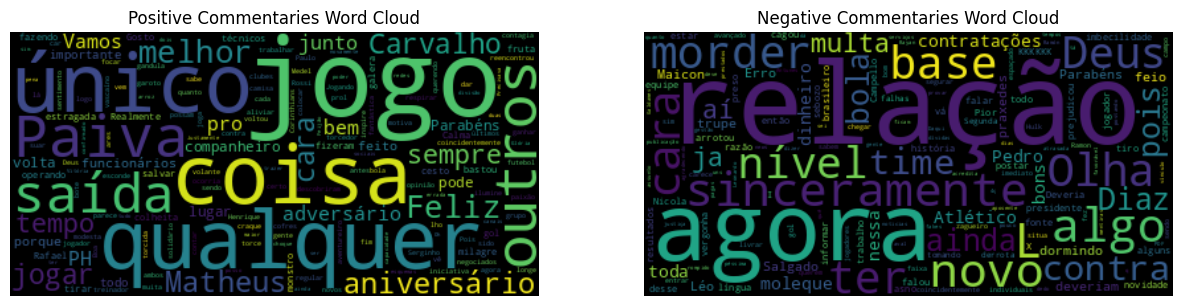

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stop_words import get_stop_words


positive_commentaries = commentaries[commentaries['score'] == 2]['commentary']
negative_commentaries = commentaries[commentaries['score'] == 0]['commentary']

sample_positive = ' '.join(text for text in positive_commentaries.sample(frac=0.1, random_state=42))
sample_negative = ' '.join(text for text in negative_commentaries.sample(frac=0.1, random_state=42))

stop_words = get_stop_words('portuguese')
stop_words.extend(['Vasco', 'é', 'pra', 'caso', 'vai', 'deu', 'vão', 'clube', 'ca'])

wordcloud_positive = WordCloud(stopwords=stop_words).generate(sample_positive)
wordcloud_negative = WordCloud(stopwords=stop_words).generate(sample_negative)

plt.figure(figsize=(15, 7.5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Commentaries Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Commentaries Word Cloud')
plt.axis("off")

plt.show()

In [17]:
from nltk import word_tokenize

commentaries_lens = [len(word_tokens) for word_tokens in [word_tokenize(commentary) for commentary in commentaries['commentary']]]

In [34]:
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('rslp')

class RSLPTokenizer(object):
    def __init__(self):
        self.rslp = RSLPStemmer()
    def __call__(self, articles):
        return [self.rslp.stem(t) for t in word_tokenize(articles)]

vect = TfidfVectorizer(
    tokenizer = RSLPTokenizer(),
    token_pattern = None,
    lowercase = True,
    strip_accents = 'unicode',
    max_features = 3000
)

vect.fit(commentaries['commentary'])
X = vect.transform(commentaries['commentary'])
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
X_df['n_tokens'] = commentaries_lens
X_df.head()

[nltk_data] Downloading package rslp to /home/pedro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


,!,#,$,%,','','s,(,),*,...,🙌,🙌🏽🙌🏽🙌🏽,🙌🙏😁,🙏,🙏🙌😁,🤣🤣🤣,🤦🏿‍♂️,🥲,🥲descans,n_tokens
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.789441,0.0,0.0,0.000000,0.0,0.000000,0.135682,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
2,0.000000,0.0,0.0,0.000000,0.0,0.154413,0.000000,0.197143,0.197143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29
3,0.140209,0.0,0.0,0.198629,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [37]:
y = commentaries['score']

X_df.to_feather('./preprocessed_data/x.feather')
y.to_csv('./preprocessed_data/y.csv')